<h1 style="text-align:center">Минимизация методом квадратичной интерполяции</h1>

<p style="text-align:center">Нет входных данных<br>
Нет выходных данных<br>
Лимит по времени: 100 с<br>
Лимит по памяти: 128 МБ<br></p>

<h2>Условие</h2>
<p>Реализовать метод квадратичной интерполяции для нахождения минимума функции, заданной на отрезке. Привести примеры функций, для которых процесс</p>

<ul style="margin-left:10%">
    <li>сходится сверхлинейно;</li>
    <li>сходится с линейной скоростью;</li>
    <li>не сходится.</li>
</ul>

<p>Ваша программа должна строить графики этих функций, выдавать найденную точку минимума и значение функции в ней и количество вычислений значений функции.</p>

<h2>Теория</h2>
<p>Интерполяция функции Y(x) одной переменной х, заданной (n+1) узлами y(x), где i=0,1,2,…n, заключается в нахождении значений Y по значениям х, находящихся в отрезке [X0,..Xn).<br>
При интерполяции функция f(x) заменяется интерполяционным полиномом p(x),значения которого p(x) в узлах точно совпадают с y(x). Значение n задает степень полинома p(x).<br>
Существует ряд специальных видов полинома p(x).

Метод заключается в замене f(x) в промежутке X1+(-)h, где X1 — начальное приближение, квадратичной параболой, экстремум которой вычисляется аналитически.<br>
После приближенного нахождения экстремума Xm можно задать X1=Xm и повторить поиск.<br>
Таким образом, с помощью итерационной процедуры значение Xm уточняется до получения его с заданной погрешностью e.

Этот метод обеспечивает поиск как максимумов, так и минимумов f(x), в том числе для случая f(x)=0, причем точка Xm может лежать в интервале X1+(-)h (интерполяция)</p>

<h2>Алгоритм</h2>
<p>1. Задаем начальное приближение X1 для Xm и вычисляем два смежных значения аргумента F(x): x0=x1-h и x2=x1+h, где h — полуинтервал интерполяци<br>
2. Вычисляем три значения F(x): F(x)=F0, F(x1)=F1, F(x2)=F2.<br>
3. Находим коэффициенты параболы Y(Х)=X^2+BX+C, C=F0/2h^2-F1/h^2+F2/2h^2=(F0-2F1+F2)/2h^2,B=(-F0(2×1+h)+4F1x1-F2(2×1-h)/2h^2<br>
3. Проходящей через выбранные три узла интерполяции<br>
4. F(x), и по ним вычисляем аналитически положение экстремума Xm=-B/2C=(F0(2×1+h)-4F1x1+F2(2×1-h)/2*(F0-2F1+F2).<br>
5. Проверяем выполнение условия ABS(Xm-X1) < e. Если оно не выполняется, задаем X1=Xm и идем к п.1. Если выполняется, считаем Xm найденным с заданной погрешностью e, вычисляем F(Xm) и останавливаем счет.</p>

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [8]:
def def_sqrt(x):
    return (0.1*x*x*x - 2*x*x + 10*math.sqrt(x))


def sqr_interpolation(h, x1, e):
    xm = x1
    f0 = def_sqrt(x1 - h)
    f1 = def_sqrt(x1)
    f2 = def_sqrt(x1 + h)

    c = (f0 - 2*f1 + f2) / (2*h*h)
    b = ((-1)*f0*(2*x1 + h) + 4*f1*x1 - f2*(2*x1-h)) / (2*h*h)

    xm = (-1) * b / (2 * c)

    while ((xm - x1) < e):
        x1 = xm
        f0 = def_sqrt(x1 - h)
        f1 = def_sqrt(x1)
        f2 = def_sqrt(x1 + h)

        c = (f0 - 2*f1 + f2) / (2*h*h)
        b = ((-1)*f0*(2*x1 + h) + 4*f1*x1 - f2*(2*x1-h)) / (2*h*h)

        xm = (-1) * b / (2 * c)
    return [xm, def_sqrt(xm)]

<h2 style="text-align:center">Функция сходится сверхлинейно</h2>

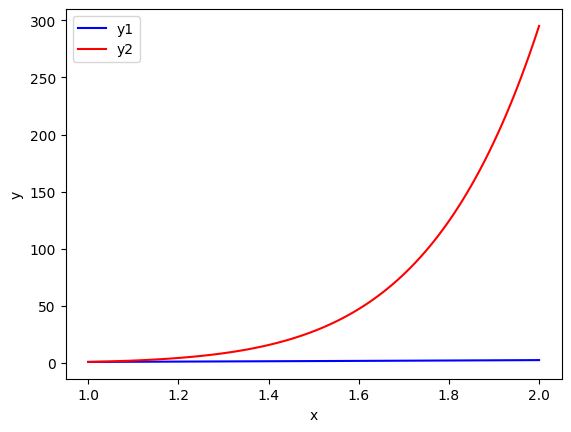

In [9]:
x = np.linspace(1, 2, 100)
y1 = x ** sqr_interpolation(1, 1, 0.1)[0]
y2 = x ** sqr_interpolation(1, 1, 0.1)[1]

fig, ax = plt.subplots()                       
ax.plot(x, y1, color="blue", label="y1")
ax.plot(x, y2, color="red", label="y2")
ax.set_xlabel("x")
ax.set_ylabel("y")                             
ax.legend()                                    

plt.show()   

<h2 style="text-align:center">Функция сходится с линейной скоростью</h2>

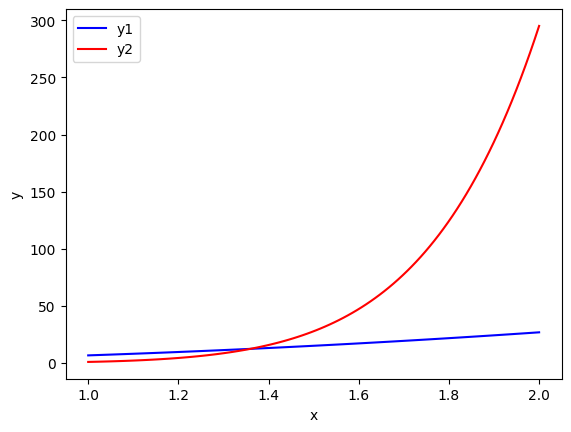

In [10]:
x = np.linspace(1, 2, 100)
y1 = x ** 2 * 4 ** sqr_interpolation(1, 1, 0.1)[0]
y2 = x ** sqr_interpolation(1, 1, 0.1)[1]

fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y1")
ax.plot(x, y2, color="red", label="y2")
ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.legend()

plt.show()  

<h2 style="text-align:center">Функция не сходится</h2>

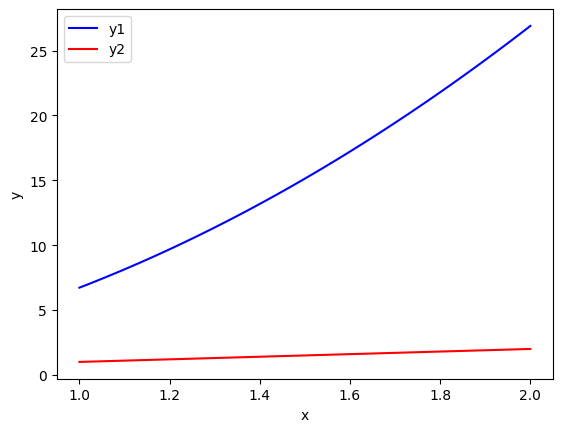

In [11]:
x = np.linspace(1, 2, 100)
y1 = x ** 2 * 4 ** sqr_interpolation(1, 1, 0.1)[0]
y2 = x ** 1 ** sqr_interpolation(1, 1, 0.1)[1]

fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y1")
ax.plot(x, y2, color="red", label="y2")
ax.set_xlabel("x")
ax.set_ylabel("y")                              
ax.legend()                                     

plt.show()   